In [1]:
import tensorflow as tf
import keras
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
#The first dataset in train_data be like
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [3]:
train_labels[0]

3

In [4]:
#translate number into word
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key, value) in word_index.items()])
decode_review =' '.join(
    [reverse_word_index.get(i-3,'?')for i in train_data[0]])

557056/550378 [==============================] - 1s 2us/step


In [5]:
reverse_word_index [3]

'to'

In [11]:
#preprecessing, vectorize the data
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1.
    return results

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
#one hot the labels
#categorical encoding
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,labels]=1.
    return results

In [15]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [17]:
#create the model for prediction

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46,activation ='softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [18]:
#The training conditions
model.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics= [ 'accuracy'])

In [19]:
#Split the data
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
#Start training model
history =model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 237us/step - loss: 2.5331 - acc: 0.4947 - val_loss: 1.7227 - val_acc: 0.6090
Epoch 2/20
7982/7982 [==============================] - 1s 150us/step - loss: 1.4495 - acc: 0.6872 - val_loss: 1.3488 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 153us/step - loss: 1.0992 - acc: 0.7641 - val_loss: 1.1716 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.8721 - acc: 0.8151 - val_loss: 1.0791 - val_acc: 0.7610
Epoch 5/20
7982/7982 [==============================] - 1s 153us/step - loss: 0.7050 - acc: 0.8473 - val_loss: 0.9852 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.5679 - acc: 0.8789 - val_loss: 0.9398 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 152us/step - loss: 0.4606 - a

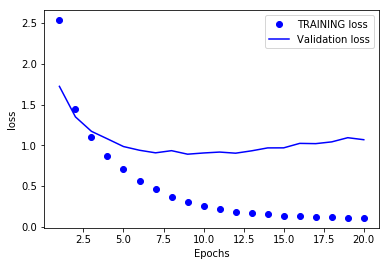

In [22]:
#Let's see how fit this data
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs =range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='TRAINING loss')
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

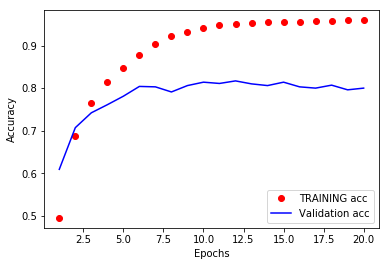

In [23]:
acc = history.history['acc']
val_acc =history.history['val_acc']

epochs =range(1,len(loss)+1)

plt.plot(epochs,acc,'ro',label='TRAINING acc')
plt.plot(epochs,val_acc,'b',label="Validation acc")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [26]:
#Around epoch = 9, they started overfitting
#so we make ne model
model2 = models.Sequential()
model2.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(46,activation ='softmax'))

model2.compile(optimizer='rmsprop',
             loss = 'categorical_crossentropy',
             metrics= [ 'accuracy'])
history2 =model2.fit(partial_x_train,
                  partial_y_train,
                  epochs=9,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 211us/step - loss: 2.5370 - acc: 0.5177 - val_loss: 1.6737 - val_acc: 0.6390
Epoch 2/9
7982/7982 [==============================] - 1s 152us/step - loss: 1.3924 - acc: 0.7062 - val_loss: 1.2825 - val_acc: 0.7200
Epoch 3/9
7982/7982 [==============================] - 1s 153us/step - loss: 1.0313 - acc: 0.7804 - val_loss: 1.1187 - val_acc: 0.7610
Epoch 4/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.7984 - acc: 0.8296 - val_loss: 1.0178 - val_acc: 0.7730
Epoch 5/9
7982/7982 [==============================] - 1s 154us/step - loss: 0.6312 - acc: 0.8656 - val_loss: 0.9698 - val_acc: 0.7860
Epoch 6/9
7982/7982 [==============================] - 1s 153us/step - loss: 0.5013 - acc: 0.8968 - val_loss: 0.9191 - val_acc: 0.7950
Epoch 7/9
7982/7982 [==============================] - 1s 155us/step - loss: 0.4001 - acc: 0.9158 - val_loss: 0.8754 - val_acc: 0.8190
Epoch 8

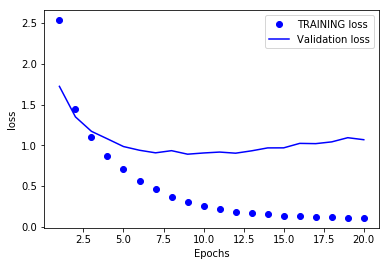

In [27]:
#Let's see how fit this data
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss =history.history['val_loss']

epochs =range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='TRAINING loss')
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [28]:
result1 = model.evaluate(x_test,one_hot_test_labels)
result1

2246/2246 [==============================] - 0s 181us/step


[1.2120074833065722, 0.7809439003202179]

In [29]:
result2=model2.evaluate(x_test,one_hot_test_labels)
result2

2246/2246 [==============================] - 0s 152us/step


[0.9944047055282661, 0.786286731967943]

In [30]:
#This time is multiclassification so we use softmax as activation function at the last layer
#the probability of all answer can sum to 1
predictions = model2.predict(x_test)

In [36]:
np.sum(predictions[0])

1.0000001

In [35]:
#Which the most biggest value is the answer of the prediction
np.argmax(predictions[0])

3